# Module 1: Understanding EEG Signals and Data Representation

---

## Introduction

Welcome to Module 1 of the onboarding series! In this module, we'll explore the basics of Electroencephalography (EEG) signals and how they are represented as data. This module is designed to give you a foundational understanding of EEG signals, which is essential for working on projects at Longhorn Neurotech.

---

## Table of Contents

1. [What is EEG?](#what-is-eeg)
2. [EEG Signal Characteristics](#eeg-signal-characteristics)
   - [EEG Frequency Bands](#eeg-frequency-bands)
3. [EEG Data Representation](#eeg-data-representation)
   - [Data Structures](#data-structures)
   - [Common File Formats](#common-file-formats)
4. [Introduction to Python Libraries](#introduction-to-python-libraries)
   - [NumPy](#numpy)
   - [SciPy](#scipy)
   - [MNE-Python](#mne-python)
   - [PyTorch](#pytorch)
5. [Visualizing EEG Signals](#visualizing-eeg-signals)
   - [Plotting Raw EEG Data](#plotting-raw-eeg-data)
   - [Visualizing Signal from a Single Channel](#visualizing-signal-from-a-single-channel)
   - [Spectral Analysis](#spectral-analysis)
   - [Power Spectral Density (PSD) Explained](#power-spectral-density-psd-explained)
   - [Computing PSD with SciPy](#computing-psd-with-scipy)
6. [Additional Key Concepts](#additional-key-concepts)
   - [Artifacts and Noise](#artifacts-and-noise)
   - [Spatial Resolution of EEG](#spatial-resolution-of-eeg)
7. [Mini-Project](#mini-project)
8. [Conclusion](#conclusion)

---

## What is EEG?

Electroencephalography (EEG) is a non-invasive method used to record the electrical activity of the brain. EEG measures voltage fluctuations resulting from ionic current flows within neurons in the brain.

**Key Points:**

- **Non-invasive:** EEG electrodes are placed along the scalp.
- **Temporal Resolution:** High temporal resolution, capturing rapid changes in brain activity.
- **Spatial Resolution:** Relatively low spatial resolution compared to other imaging techniques like fMRI. This is because EEG signals are averaged over large areas of the scalp and the electrical activity must pass through the skull and other tissues, which blurs the spatial information.
- **Portability:** EEG systems can be portable, allowing for more flexible experimental setups.

**Why EEG Has Poor Spatial Resolution:**

EEG's spatial resolution is limited due to several factors:

1. **Signal Attenuation and Distortion:** The electrical signals generated by neuronal activity must pass through the skull, scalp, and other tissues, which attenuate and distort the signals, making it difficult to pinpoint their exact origin.
2. **Volume Conduction:** Electrical activity spreads out as it travels through the conductive tissues, causing signals from multiple brain regions to overlap.
3. **Number of Electrodes:** While modern EEG systems can have many electrodes, they still cover only a limited number of scalp locations compared to the vast number of neurons involved in brain activity.

---

## EEG Signal Characteristics

EEG signals are complex and consist of various frequency components associated with different brain states and functions.

### EEG Frequency Bands

EEG signals are typically divided into different frequency bands, each associated with specific cognitive or physiological states.

| **Band** | **Frequency Range (Hz)** | **Associated States**                |
|----------|--------------------------|--------------------------------------|
| Delta    | 0.5 - 4                  | Deep sleep                           |
| Theta    | 4 - 8                    | Drowsiness, meditation               |
| Alpha    | 8 - 13                   | Relaxed wakefulness, eyes closed     |
| Beta     | 13 - 30                  | Active thinking, focus, alertness    |
| Gamma    | 30 - 100                 | High-level information processing    |

---

## EEG Data Representation

### Data Structures

EEG data is typically represented as a multi-dimensional array:

- **Channels (Electrodes):** Spatial dimension representing different locations on the scalp.
- **Time Points (Samples):** Temporal dimension representing the signal over time.
- **Trials (Epochs):** Repeated measurements or segments of data.

**Example Structure:**

```
Trials x Channels x Time Points
```

### Common File Formats

- **.edf (European Data Format):** Standard format for EEG data.
- **.fif (Functional Image File Format):** Used by MNE-Python.
- **.bdf, .set, .gdf:** Other formats depending on the recording equipment.

---

## Introduction to Python Libraries

We'll be using several Python libraries throughout this module.

### NumPy

NumPy is a fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices.

In [1]:
import numpy as np

### SciPy

SciPy builds on NumPy and provides additional functionality for scientific computing, including signal processing tools.

In [2]:
from scipy import signal

### MNE-Python

MNE-Python is an open-source package for processing EEG and MEG data.

In [3]:
import mne

---

## Visualizing EEG Signals

Visualization is a crucial step in understanding EEG data. We'll use MNE-Python and Matplotlib for visualization.

### **Assuming EEG Data is Loaded**

In [5]:
import matplotlib.pyplot as plt

# Step 1: Download and Locate the Sample Data
# note this downloads the sample dataset. It tends to download in the user's home directory.
sample_data_folder = mne.datasets.sample.data_path() # downloaded in home directory not CWD

# Step 2: Define the Path to the Raw Data File
# The sample dataset includes both MEG and EEG data
raw_file = sample_data_folder / 'MEG' / 'sample' / 'sample_audvis_raw.fif'

# Step 3: Load the Raw Data
# preload=True loads the data into memory, allowing for faster processing
raw = mne.io.read_raw_fif(raw_file, preload=True)

# Step 4: Extract EEG Channels Only
# This removes MEG and other non-EEG channels from the dataset
raw_eeg = raw.copy().pick_types(meg=False, eeg=True)

# Step 5: Basic Information About the Data
print(raw_eeg.info)

Opening raw data file C:\Users\Nathan\mne_data\MNE-sample-data\MEG\sample\sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
<Info | 19 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: []
 ch_names: EEG 001, EEG 002, EEG 003, EEG 004, EEG 005, EEG 006, EEG 007, ...
 chs: 59 EEG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 20

---

### Plotting Raw EEG Data

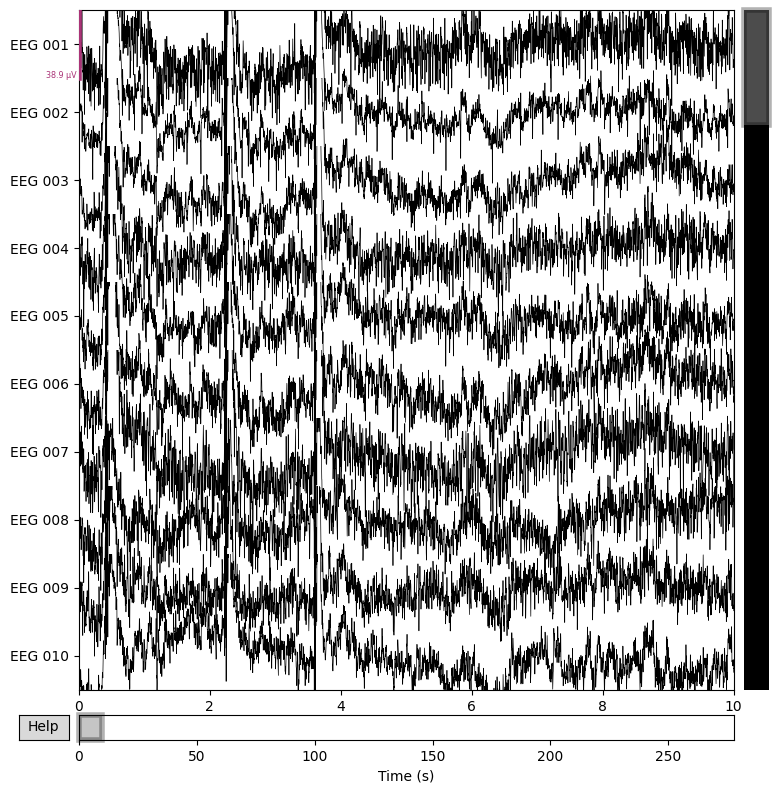

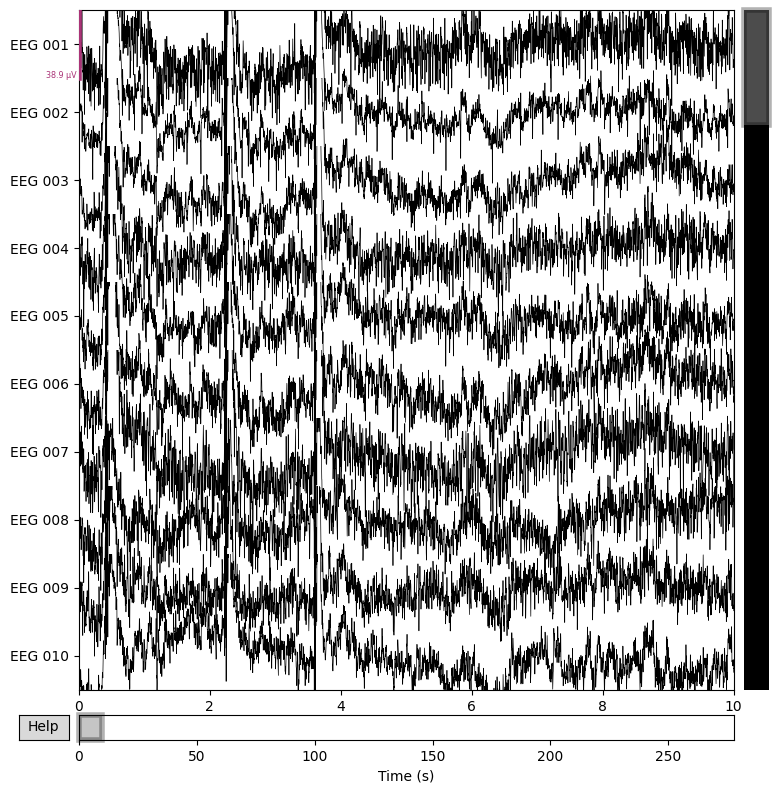

In [10]:
raw_eeg.plot(n_channels=10, scalings='auto')

### Visualizing Signal from a Single Channel


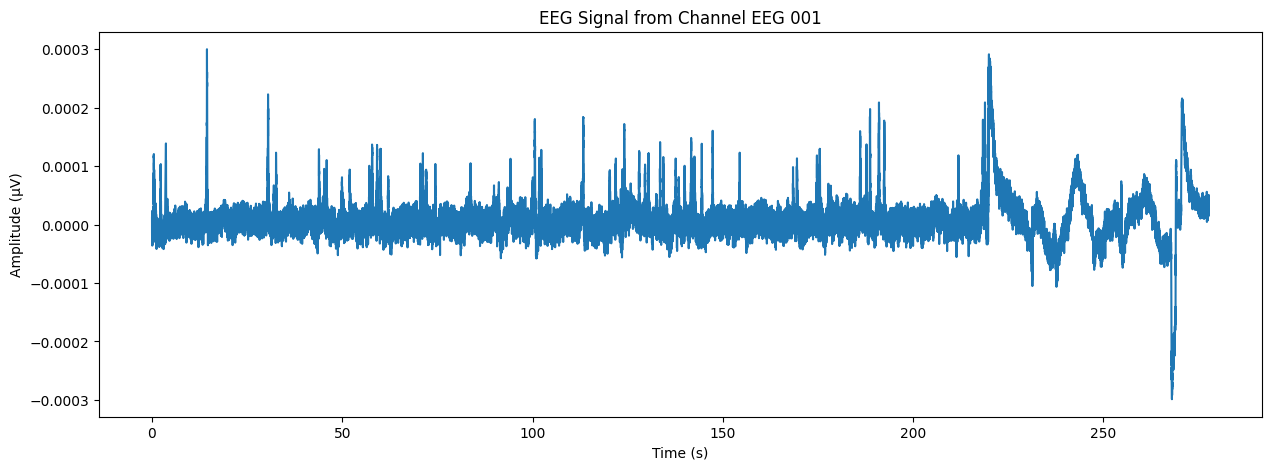

In [11]:
# Select data from a single channel
channel_data = raw_eeg.get_data(picks=['EEG 001'])[0]

plt.figure(figsize=(15, 5))
plt.plot(raw_eeg.times, channel_data)
plt.title('EEG Signal from Channel EEG 001')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.show()

### Spectral Analysis

Effective window size : 0.426 (s)


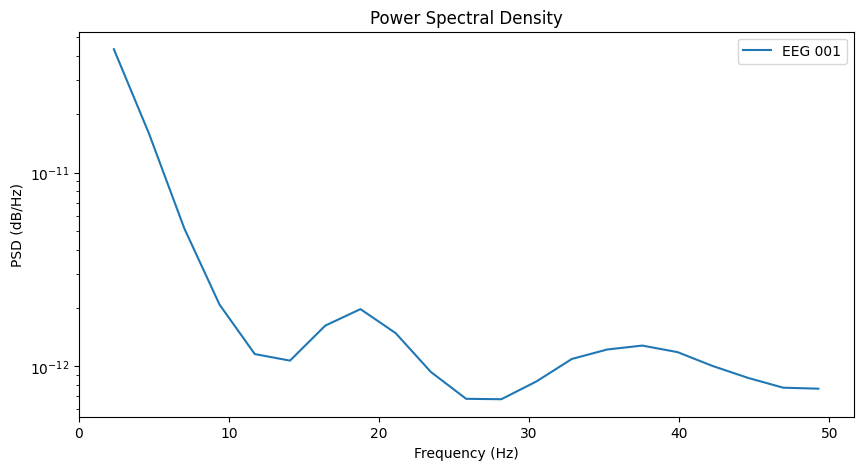

In [17]:
# Compute the power spectral density (PSD) using MNE-Python
from mne.time_frequency import psd_array_welch
psds, freqs = psd_array_welch(raw_eeg_data, fmin=0.5, fmax=50.0, sfreq=raw_eeg.info['sfreq'])

# Plot PSD
plt.figure(figsize=(10, 5))
plt.semilogy(freqs, psds[0], label='EEG 001')
plt.title('Power Spectral Density')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB/Hz)')
plt.legend()
plt.show()

### Power Spectral Density (PSD) Explained

**What is PSD?**

Power Spectral Density (PSD) is a measure of the power distribution of a signal as a function of frequency. It shows how the power of a signal or time series is distributed across different frequency components.

**Why is PSD Important?**

1. **Frequency Analysis:** PSD allows us to identify the dominant frequencies present in EEG signals, which are associated with different brain states and cognitive processes.
2. **Feature Extraction:** In applications like motor imagery for Brain-Computer Interfaces (BCIs), specific frequency bands (e.g., mu and beta bands) are targeted. Analyzing PSD helps in extracting relevant features for classification and interpretation.
3. **Signal Quality Assessment:** PSD can help in identifying artifacts and noise by revealing unexpected frequency components.

**Connection to Motor Imagery:**

In motor imagery tasks, individuals imagine performing a movement (e.g., moving a limb) without actual execution. This mental activity induces changes in specific EEG frequency bands, particularly the mu (8-13 Hz) and beta (13-30 Hz) bands. By analyzing the PSD, we can detect these changes, which are crucial for developing BCIs that translate motor imagery into control signals for external devices.

---

### Computing PSD with SciPy

In addition to MNE-Python, SciPy can be used to compute the PSD using methods like Welch's method.

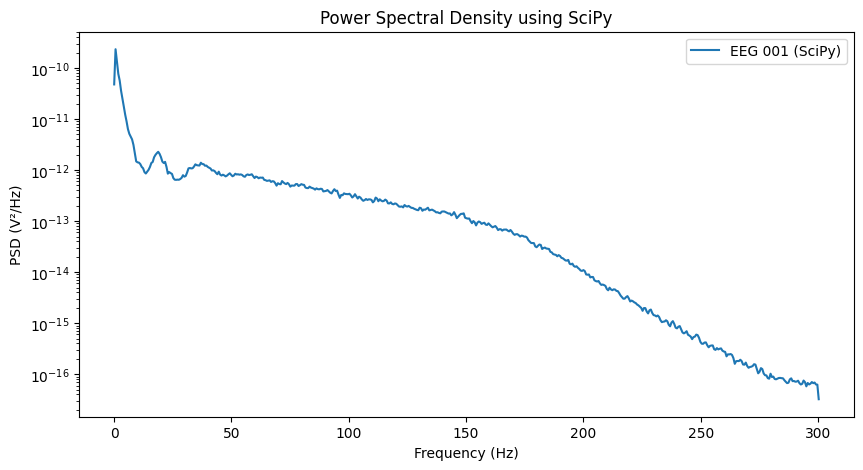

In [22]:
# Select data from a single channel
channel_data = raw_eeg.get_data(picks=['EEG 001'])[0]

# Compute PSD using SciPy
frequencies, psd_values = signal.welch(channel_data, 
                                       fs=raw_eeg.info['sfreq'], 
                                       nperseg=1024, 
                                       scaling='density')

# Plot PSD
plt.figure(figsize=(10, 5))
plt.semilogy(frequencies, psd_values, label='EEG 001 (SciPy)')
plt.title('Power Spectral Density using SciPy')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V²/Hz)')
plt.legend()
plt.show()

**Comparison Between MNE-Python and SciPy:**

- **MNE-Python:** Tailored for neurophysiological data, integrates seamlessly with EEG data structures, and offers advanced options specific to EEG analysis.
- **SciPy:** General-purpose scientific computing library, offering flexibility and control over signal processing tasks but requires manual handling of EEG-specific data structures.

Both methods provide valuable insights, and the choice depends on the specific requirements of your analysis.

---

## Additional Key Concepts

### Artifacts and Noise

**Artifacts:** Unwanted signals in EEG data that are not related to brain activity. Common artifacts include:

- **Eye Blinks and Movements:** Generate large voltage changes, especially in frontal electrodes.
- **Muscle Activity (EMG):** High-frequency noise resulting from muscle contractions.
- **Heartbeat (ECG):** Periodic artifacts related to the cardiac cycle.
- **Environmental Noise:** Electrical interference from equipment or external sources.

**Importance:**

Understanding and identifying artifacts is crucial for ensuring data quality and the accuracy of subsequent analyses. While artifact removal (filtering) will be discussed in a later section, being aware of common artifacts helps in interpreting raw EEG signals.

### Spatial Resolution of EEG

As previously mentioned, EEG has relatively poor spatial resolution compared to other neuroimaging techniques like fMRI. This limitation affects:

- **Localization:** Difficulty in precisely identifying the exact brain regions generating the observed electrical activity.
- **Interpretation:** Caution is needed when linking EEG signals to specific cognitive or motor functions due to the overlapping and diffuse nature of the electrical signals.

**Implications for Motor Imagery:**

When working with motor imagery, the low spatial resolution means that while we can detect changes in frequency bands associated with motor areas (e.g., mu and beta rhythms), pinpointing the exact neural sources requires additional methods or complementary imaging techniques.

---

## Mini-Project

### Objective

- Visualize EEG signals from multiple channels.
- Identify and label different EEG frequency bands in the spectral analysis.

### Instructions

1. **Select Multiple Channels:**
   - Choose at least 3 different EEG channels from the dataset.

2. **Time-Domain Visualization:**
   - Plot the time-series data for each selected channel.
   - Annotate any noticeable patterns or events.

3. **Frequency-Domain Analysis:**
   - Compute and plot the Power Spectral Density (PSD) for each channel using either MNE-Python and SciPy.
   - Identify peaks corresponding to different EEG frequency bands.

4. **Interpretation:**
   - Write a brief analysis explaining the observed patterns in both time and frequency domains.
   - Discuss any differences between channels.

### Tips

- Use `raw_eeg_data.plot()` and `matplotlib` for plotting.
- Refer to the frequency bands table to identify different components.
- Ensure plots are well-labeled and readable.
- Leverage both MNE-Python and SciPy for computing PSD to compare results.

---

In [ ]:
# Complete Module 1